In [3]:
# Import TextBlob for sentiment analysis
from textblob import TextBlob

In [4]:
# clone githug repository
!git clone https://github.com/GeorgeNikitakis/AIDI_1002.git

Cloning into 'AIDI_1002'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 58 (delta 20), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (58/58), done.


In [5]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

# **EDA SECTION**

In [6]:
# import cleaned data set
df = pd.read_csv ('AIDI_1002/Data Acquisition and Understanding/data_cleaned.csv')
print(df.columns)

Index(['name', 'brand', 'categories', 'manufacturer', 'reviews.doRecommend',
       'reviews.numHelpful', 'reviews.rating', 'reviews.text',
       'reviews.title'],
      dtype='object')


In [7]:
print(df.shape)
print(df.isnull().sum())

(34660, 9)
name                   6760
brand                     0
categories                0
manufacturer              0
reviews.doRecommend     594
reviews.numHelpful      529
reviews.rating           33
reviews.text              1
reviews.title             5
dtype: int64


In [8]:
df = df[df['reviews.text'].notna()]
df = df[df['reviews.title'].notna()]
df = df[df['reviews.rating'].notna()]
print(df.shape)
print(df.isnull().sum())

(34621, 9)
name                   6757
brand                     0
categories                0
manufacturer              0
reviews.doRecommend     559
reviews.numHelpful      493
reviews.rating            0
reviews.text              0
reviews.title             0
dtype: int64


In [9]:
# extract and create new dataframe with reviews text and title
reviews_df = df[['reviews.text','reviews.title']].astype(str)
print(reviews_df)

                                            reviews.text                                      reviews.title
0      This product so far has not disappointed. My c...                                             Kindle
1      great for beginner or experienced person. Boug...                                          very fast
2      Inexpensive tablet for him to use and learn on...            Beginner tablet for our 9 year old son.
3      I've had my Fire HD 8 two weeks now and I love...                                            Good!!!
4      I bought this for my grand daughter when she c...                          Fantastic Tablet for kids
...                                                  ...                                                ...
34655  This is not appreciably faster than any other ...  Not appreciably faster than any other 1.8A cha...
34656  Amazon should include this charger with the Ki...                                 Should be included
34657  Love my Kindle Fire b

In [10]:
# Cleaning Text Function to remove any numbers and decimals
def clean(text):
  text = re.sub(r'[0-9\.]+', '', text)

  return text

In [11]:
# applying the clean function to reviews text
reviews_df['reviews.text'] = reviews_df['reviews.text'].apply(clean)

In [12]:
# applying the clean function to reviews title
reviews_df['reviews.title'] = reviews_df['reviews.title'].apply(clean)

In [13]:
# retrieve and store sentiment alanysis for reviews text
reviews_df['reviews.text.sentiment'] = reviews_df['reviews.text'].apply(lambda x: TextBlob(x).polarity)
print(reviews_df)

                                            reviews.text  ... reviews.text.sentiment
0      This product so far has not disappointed My ch...  ...               0.325000
1      great for beginner or experienced person Bough...  ...               0.800000
2      Inexpensive tablet for him to use and learn on...  ...               0.600000
3      I've had my Fire HD  two weeks now and I love ...  ...               0.374583
4      I bought this for my grand daughter when she c...  ...               0.368056
...                                                  ...  ...                    ...
34655  This is not appreciably faster than any other ...  ...               0.183333
34656  Amazon should include this charger with the Ki...  ...               0.000000
34657  Love my Kindle Fire but I am really disappoint...  ...               0.183333
34658  I was surprised to find it did not come with a...  ...              -0.100000
34659  to spite the fact that i have nothing but good...  ...    

In [14]:
# retrieve and store sentiment analysis for reviews title
reviews_df['reviews.title.sentiment'] = reviews_df['reviews.title'].apply(lambda x: TextBlob(x).polarity)
print(reviews_df)

                                            reviews.text  ... reviews.title.sentiment
0      This product so far has not disappointed My ch...  ...                   0.000
1      great for beginner or experienced person Bough...  ...                   0.260
2      Inexpensive tablet for him to use and learn on...  ...                   0.100
3      I've had my Fire HD  two weeks now and I love ...  ...                   1.000
4      I bought this for my grand daughter when she c...  ...                   0.400
...                                                  ...  ...                     ...
34655  This is not appreciably faster than any other ...  ...                  -0.125
34656  Amazon should include this charger with the Ki...  ...                   0.000
34657  Love my Kindle Fire but I am really disappoint...  ...                  -0.600
34658  I was surprised to find it did not come with a...  ...                  -0.150
34659  to spite the fact that i have nothing but good.

In [ ]:
# print(reviews_df.columns)

In [15]:
rating_df = df['reviews.rating'].astype(str).astype(float)
# rating_df = pd.to_numeric(rating_df).convert_dtypes()
print(rating_df)

0        5.0
1        5.0
2        5.0
3        4.0
4        5.0
        ... 
34655    3.0
34656    1.0
34657    1.0
34658    1.0
34659    1.0
Name: reviews.rating, Length: 34621, dtype: float64


In [ ]:
# import nltk
# nltk.download('vader_lexicon')
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# vader = SentimentIntensityAnalyzer()

# reviews_df['reviews.text.sentiment2'] = reviews_df['reviews.text'].apply(lambda x: vader.polarity_scores(x)['compound'])
# print(reviews_df)

                                            reviews.text  ... reviews.text.sentiment2
0      This product so far has not disappointed My ch...  ...                  0.9194
1      great for beginner or experienced person Bough...  ...                  0.8934
2      Inexpensive tablet for him to use and learn on...  ...                  0.4404
3      I've had my Fire HD  two weeks now and I love ...  ...                  0.9884
4      I bought this for my grand daughter when she c...  ...                  0.7876
...                                                  ...  ...                     ...
34655  This is not appreciably faster than any other ...  ...                  0.8615
34656  Amazon should include this charger with the Ki...  ...                  0.5994
34657  Love my Kindle Fire but I am really disappoint...  ...                 -0.0360
34658  I was surprised to find it did not come with a...  ...                  0.0690
34659  to spite the fact that i have nothing but good.

In [ ]:
# reviews_df['reviews.title.sentiment2'] = reviews_df['reviews.title'].apply(lambda x: vader.polarity_scores(x)['compound'])

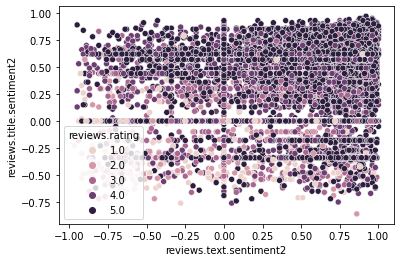

In [ ]:
# X = round(reviews_df['reviews.text.sentiment2'], 2)
# Y = round(reviews_df['reviews.title.sentiment2'], 2)
# test1 = sns.scatterplot(x = X, y = Y, hue = rating_df )

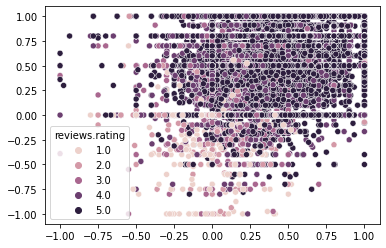

In [ ]:
# def Extract(a):
#   return [item[0] for item in a]

# A = Extract(reviews_df['reviews.text.sentiment'])
# B = Extract(reviews_df['reviews.title.sentiment'])
# test2 = sns.scatterplot(x = A, y = B, hue = rating_df )

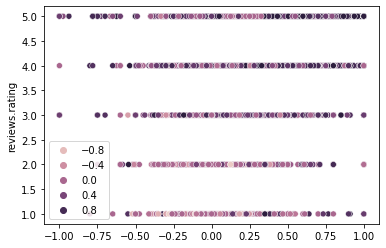

In [ ]:
# test2 = sns.scatterplot(x = A, y = rating_df, hue = B )

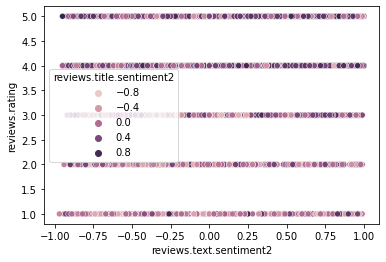

In [ ]:
# test1 = sns.scatterplot(x = X, y = rating_df, hue = Y )

# **Sentiment Analysis and Recommender**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [17]:
print(reviews_df.columns)

Index(['reviews.text', 'reviews.title', 'reviews.text.sentiment',
       'reviews.title.sentiment'],
      dtype='object')


In [18]:
reviews_df['reviews.rating'] = rating_df
print(reviews_df)

                                            reviews.text  ... reviews.rating
0      This product so far has not disappointed My ch...  ...            5.0
1      great for beginner or experienced person Bough...  ...            5.0
2      Inexpensive tablet for him to use and learn on...  ...            5.0
3      I've had my Fire HD  two weeks now and I love ...  ...            4.0
4      I bought this for my grand daughter when she c...  ...            5.0
...                                                  ...  ...            ...
34655  This is not appreciably faster than any other ...  ...            3.0
34656  Amazon should include this charger with the Ki...  ...            1.0
34657  Love my Kindle Fire but I am really disappoint...  ...            1.0
34658  I was surprised to find it did not come with a...  ...            1.0
34659  to spite the fact that i have nothing but good...  ...            1.0

[34621 rows x 5 columns]


In [19]:
norm = {'1.0':-1, '2.0':-0.5, '3.0':0, '4.0':0.5, '5.0':1}
reviews_df['reviews.rating'] = reviews_df['reviews.rating'].astype(str)
reviews_df['reviews.rating'] = [norm[item] for item in reviews_df['reviews.rating']]
print(reviews_df)



                                            reviews.text  ... reviews.rating
0      This product so far has not disappointed My ch...  ...            1.0
1      great for beginner or experienced person Bough...  ...            1.0
2      Inexpensive tablet for him to use and learn on...  ...            1.0
3      I've had my Fire HD  two weeks now and I love ...  ...            0.5
4      I bought this for my grand daughter when she c...  ...            1.0
...                                                  ...  ...            ...
34655  This is not appreciably faster than any other ...  ...            0.0
34656  Amazon should include this charger with the Ki...  ...           -1.0
34657  Love my Kindle Fire but I am really disappoint...  ...           -1.0
34658  I was surprised to find it did not come with a...  ...           -1.0
34659  to spite the fact that i have nothing but good...  ...           -1.0

[34621 rows x 5 columns]


In [20]:
new_df = reviews_df[['reviews.text.sentiment','reviews.title.sentiment']].mean(axis=1)
print(new_df)




0        0.162500
1        0.530000
2        0.350000
3        0.687292
4        0.384028
           ...   
34655    0.029167
34656    0.000000
34657   -0.208333
34658   -0.125000
34659    0.206122
Length: 34621, dtype: float64


In [21]:
conditions = [
    (reviews_df['reviews.rating']>0) & (new_df>=0),
    (reviews_df['reviews.rating']<0) & (new_df>=.6),
    (reviews_df['reviews.rating']==0) & (new_df>=.5)]
choices = ['accessory', 'accessory', 'accessory']
reviews_df['result'] = np.select(conditions, choices, default='similar item')
print(reviews_df)

                                            reviews.text  ...        result
0      This product so far has not disappointed My ch...  ...     accessory
1      great for beginner or experienced person Bough...  ...     accessory
2      Inexpensive tablet for him to use and learn on...  ...     accessory
3      I've had my Fire HD  two weeks now and I love ...  ...     accessory
4      I bought this for my grand daughter when she c...  ...     accessory
...                                                  ...  ...           ...
34655  This is not appreciably faster than any other ...  ...  similar item
34656  Amazon should include this charger with the Ki...  ...  similar item
34657  Love my Kindle Fire but I am really disappoint...  ...  similar item
34658  I was surprised to find it did not come with a...  ...  similar item
34659  to spite the fact that i have nothing but good...  ...  similar item

[34621 rows x 6 columns]


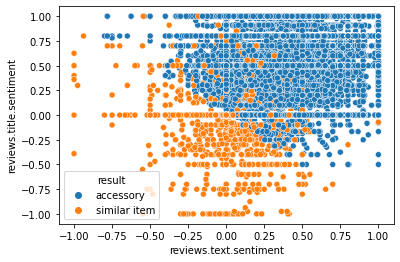

In [ ]:
# sns.scatterplot(x=reviews_df['reviews.text.sentiment'], y=reviews_df['reviews.title.sentiment'], hue=reviews_df['result'])

In [22]:
reviews_features = reviews_df.drop(columns=['result','reviews.text','reviews.title'])
print(reviews_features)
reviews_result = reviews_df['result']
print(reviews_result)

       reviews.text.sentiment  reviews.title.sentiment  reviews.rating
0                    0.325000                    0.000             1.0
1                    0.800000                    0.260             1.0
2                    0.600000                    0.100             1.0
3                    0.374583                    1.000             0.5
4                    0.368056                    0.400             1.0
...                       ...                      ...             ...
34655                0.183333                   -0.125             0.0
34656                0.000000                    0.000            -1.0
34657                0.183333                   -0.600            -1.0
34658               -0.100000                   -0.150            -1.0
34659                0.412245                    0.000            -1.0

[34621 rows x 3 columns]
0           accessory
1           accessory
2           accessory
3           accessory
4           accessory
            

In [23]:
# Importing SKF
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
# This function takes our model and trains it. It will then only show the predictions and accuracy score test sets that are above a designated percent
def get_model(model, x_train, x_test, y_train, y_test):
  model.fit(x_train, y_train)
  if model.score(x_test, y_test) > 0.97:
    return model.predict(x_test), accuracy_score(model.predict(x_test),y_test)

In [24]:
tree1 = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)

In [25]:
# Using SKF with 10 divisions to split our training and testing datasets
for train_set,test_set in skf.split(reviews_features,reviews_result):
  x_train, x_test, y_train, y_test = reviews_features.iloc[train_set], reviews_features.iloc[test_set], reviews_result.iloc[train_set], reviews_result.iloc[test_set]

  print(get_model(tree1, x_train, x_test, y_train, y_test)) # Because we are printing our "get_model" function in our loop we will only see the test results from scores above 97%

(array(['accessory', 'accessory', 'accessory', ..., 'accessory',
       'accessory', 'accessory'], dtype=object), 0.9922032919434016)
(array(['similar item', 'similar item', 'similar item', ..., 'accessory',
       'accessory', 'accessory'], dtype=object), 0.9910456383593299)
(array(['similar item', 'similar item', 'similar item', ..., 'accessory',
       'accessory', 'accessory'], dtype=object), 0.9948006932409013)
(array(['similar item', 'similar item', 'similar item', ..., 'accessory',
       'accessory', 'accessory'], dtype=object), 0.9904679376083189)
(array(['similar item', 'similar item', 'similar item', ..., 'accessory',
       'accessory', 'accessory'], dtype=object), 0.9927787406123628)
(array(['similar item', 'similar item', 'similar item', ..., 'accessory',
       'accessory', 'accessory'], dtype=object), 0.9916233391103408)
(array(['similar item', 'similar item', 'similar item', ..., 'accessory',
       'accessory', 'accessory'], dtype=object), 0.989312536106297)
(array(['

In [168]:
phones = ['samsung s21','huawei p30 pro','iphone xs']
watches = ['samgsung watch','apple watch','google watch']
headphones = ['sony', 'samsung', 'apple']

products_sell = pd.DataFrame (phones, columns = ['phones'])
products_sell['watches'] = watches
products_sell['headphones'] = headphones
print(products_sell)

           phones         watches headphones
0     samsung s21  samgsung watch       sony
1  huawei p30 pro     apple watch    samsung
2       iphone xs    google watch      apple


In [169]:
prod = input('test purpose enter items in "products_sell"')
category1 = products_sell.columns[(products_sell == prod).any()].tolist()
category1 = category1[0]
print(category1)
new_text = input('enter review text')
new_title = input('enter review title')
new_rating = str(float(input('star rating from 1(very bad)-5(very good)')))
new_review = [new_text, new_title, new_rating]
print(new_review)

test purpose enter items in "products_sell"sony
headphones
enter review texti love them
enter review titlegreat!
star rating from 1(very bad)-5(very good)4
['i love them', 'great!', '4.0']


In [176]:
def conv_new(text, title, rating):
  text = re.sub(r'[0-9\.]+', '', text)
  title = re.sub(r'[0-9\.]+', '', title)
  text_score = TextBlob(text).polarity
  title_score = TextBlob(title).polarity
  new_list = [text_score, title_score, norm[rating]]
  return new_list


test_x = conv_new(new_review[0], new_review[1], new_review[2])
test_df = pd.DataFrame([test_x])
test_df.columns =['reviews.text.sentiment','reviews.title.sentiment','reviews.rating']
print(test_df)

   reviews.text.sentiment  reviews.title.sentiment  reviews.rating
0                     0.5                      1.0             0.5


In [177]:
def try_model(model, x_train, x_test, y_train):
  model.fit(x_train, y_train)
  return model.predict(x_test)

pred = (try_model(tree1, reviews_features, test_df, reviews_result))
print(pred)

['accessory']


In [178]:
def recommend_prod(prediction, product, category, df):
  if (prediction == 'similar item'):
    items = list(df[category].unique())
    items.remove(product)
    return items
  else:
    items = df.drop(columns=[category])
    return items
    

In [179]:
recommend_prod(pred, prod, category1, products_sell)

,phones,watches
0,samsung s21,samgsung watch
1,huawei p30 pro,apple watch
2,iphone xs,google watch
